In [1]:
import os
os.chdir('../') # set working directory

In [2]:
import sqlite3
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
db_path = 'sql/eleicao.db' 
connection = sqlite3.connect(db_path)

In [14]:
cur = connection.cursor()

# Pegar e comparar todos os candidatos por municipio

In [85]:
from scipy import stats

OR vp.DS_SIT_TOT_TURNO = 'ELEITO POR MÉDIA'

In [234]:
querry = """
SELECT Distinct VP.NM_CANDIDATO
FROM votos_candidato as vp
WHERE vp.DS_CARGO = 'Deputado Federal'  AND (vp.DS_SIT_TOT_TURNO = 'ELEITO POR QP') 
"""

# Run the query and store results in DataFrame r
r = pd.read_sql_query(querry, connection)

candidatos = r['NM_CANDIDATO'].values

data = []
for i,vp1 in enumerate(candidatos):
    for vp2 in candidatos[i+1:]:
        if i == j:
            continue
        querry = """
        SELECT vp1.QT_VOTOS_NOMINAIS_VALIDOS * 100.0/B.v0001 as c1, vp1.NR_PARTIDO as p1, vp2.QT_VOTOS_NOMINAIS_VALIDOS * 100.0/B.v0001 as c2, vp2.NR_PARTIDO as p2
        FROM votos_candidato as vp1, votos_candidato as vp2, basico as b
        WHERE vp1.NM_CANDIDATO = '{}' AND vp2.NM_CANDIDATO = '{}' AND VP1.CD_MUN = VP2.CD_MUN AND B.CD_MUN = VP1.CD_MUN
        """.format(vp1,vp2)
        c = pd.read_sql_query(querry, connection)

        res = stats.spearmanr(c['c1'].values, c['c2'].values)

        data.append([vp1,c['p1'].unique()[0],vp2,c['p2'].unique()[0],res.statistic])



In [235]:
df = pd.DataFrame(data, columns = ['candidato1','partido1','candidato2','partido2','pearson'])

df['igual'] = df['partido1'] == df['partido2']

df.sort_values('pearson')

,candidato1,partido1,candidato2,partido2,pearson,igual
265,ARTHUR DE OLIVEIRA MAIA DA SILVA,44,MANOEL ISIDÓRIO DE SANTANA JÚNIOR,70,-0.335325,False
67,MÁRIO SÍLVIO MENDES NEGROMONTE JÚNIOR,11,MANOEL ISIDÓRIO DE SANTANA JÚNIOR,70,-0.296704,False
12,CLAUDIO CAJADO SAMPAIO,11,MANOEL ISIDÓRIO DE SANTANA JÚNIOR,70,-0.294362,False
300,MANOEL ISIDÓRIO DE SANTANA JÚNIOR,70,ALEX MARCO SANTANA SOUSA,10,-0.288221,False
310,MANOEL ISIDÓRIO DE SANTANA JÚNIOR,70,WALDENOR ALVES PEREIRA FILHO,13,-0.270389,False
...,...,...,...,...,...,...
373,ROBERTA DE ARAÚJO COSTA ROMA,22,JORGE JOSE SANTOS PEREIRA SOLLA,13,0.733497,False
14,CLAUDIO CAJADO SAMPAIO,11,ALEX MARCO SANTANA SOUSA,10,0.734215,False
345,ALDEN JOSÉ LÁZARO DA SILVA,22,ROBERTA DE ARAÚJO COSTA ROMA,22,0.743769,True
72,MÁRIO SÍLVIO MENDES NEGROMONTE JÚNIOR,11,ROBERTA DE ARAÚJO COSTA ROMA,22,0.747622,False


In [236]:
df.groupby('igual')['pearson'].mean()

igual
False    0.311393
True     0.378851
Name: pearson, dtype: float64

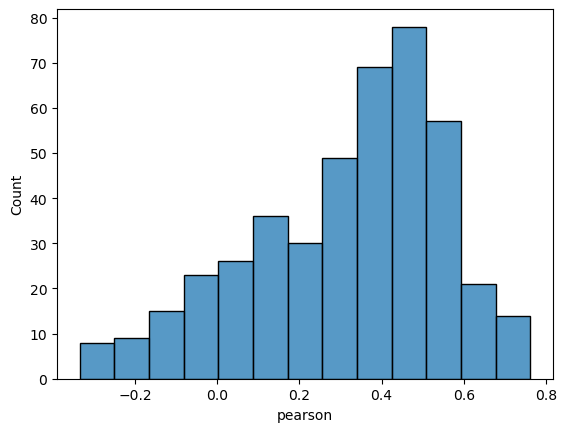

In [237]:
sns.histplot(data=df,x = 'pearson')
plt.show()

# Visualizar a região de atuação

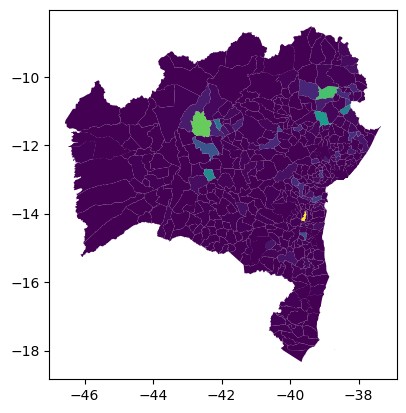

In [227]:
querry = """
SELECT m.*,VP.*, QT_VOTOS_NOMINAIS_VALIDOS * 100.0 / v0001 as coeficiente
FROM votos_candidato as vp, municipio as m, basico as b
WHERE vp.DS_CARGO = 'Deputado Federal'  AND vp.NM_CANDIDATO = 'FELIX DE ALMEIDA MENDONCA JUNIOR' AND vp.CD_MUN = m.CD_MUN AND vp.CD_MUN = b.CD_MUN
"""

# Run the query and store results in DataFrame r
r = geopandas.read_postgis(querry,connection, geom_col = 'GEOMETRY')

r.plot(column = 'coeficiente')
plt.show()

c1 = r['coeficiente'].values

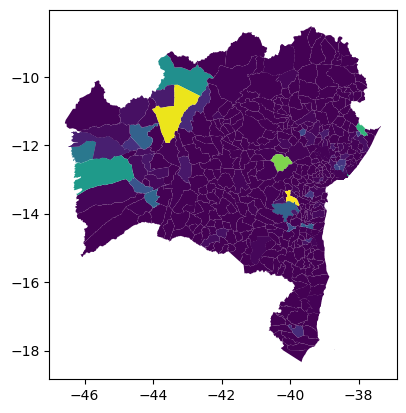

In [229]:
querry = """
SELECT m.*,VP.*, QT_VOTOS_NOMINAIS_VALIDOS * 100.0 / v0001 as coeficiente
FROM votos_candidato as vp, municipio as m, basico as b
WHERE vp.DS_CARGO = 'Deputado Federal'  AND vp.NM_CANDIDATO = 'JOÃO FELIPE DE SOUZA LEÃO' AND vp.CD_MUN = m.CD_MUN AND vp.CD_MUN = b.CD_MUN
"""

# Run the query and store results in DataFrame r
r = geopandas.read_postgis(querry,connection, geom_col = 'GEOMETRY')

r.plot(column = 'QT_VOTOS_NOMINAIS_VALIDOS')
plt.show()

c2 = r['coeficiente'].values

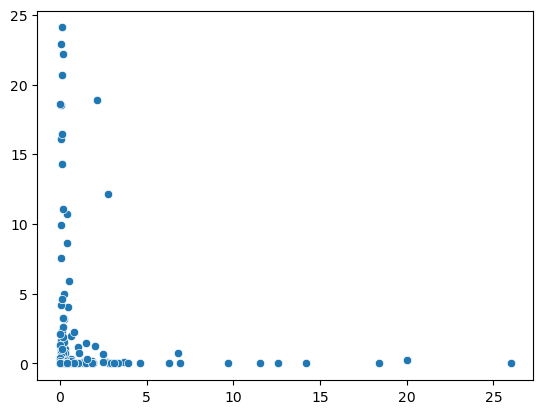

In [231]:
sns.scatterplot(x=c1,y=c2)
plt.show()

In [10]:
connection.close()